<a href="https://colab.research.google.com/github/hlsvalle/data-science/blob/master/Analise_dados_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 no Brasil e no Mundo

<p align="justify">De acordo com a OPAS - Organização Pan-Americana de Saúde a COVID-19 é uma doença infecciosa causada pelo novo coronavírus (SARS-CoV-2) e tem como principais sintomas febre, cansaço e tosse seca. Alguns pacientes podem apresentar dores, congestão nasal, dor de cabeça, conjuntivite, dor de garganta, diarreia, perda de paladar ou olfato, erupção cutânea na pele ou descoloração dos dedos das mãos ou dos pés. Esses sintomas geralmente são leves e começam gradualmente. Algumas pessoas são infectadas, mas apresentam apenas sintomas muito leves.

<p align="justify">A maioria das pessoas (cerca de 80%) se recupera da doença sem precisar de tratamento hospitalar. Uma em cada seis pessoas infectadas por COVID-19 fica gravemente doente e desenvolve dificuldade de respirar. As pessoas idosas e as que têm outras condições de saúde como pressão alta, problemas cardíacos e do pulmão, diabetes ou câncer, têm maior risco de ficarem gravemente doentes. No entanto, qualquer pessoa pode pegar a COVID-19 e ficar gravemente doente.

<center><img alt = "Colaboratory" width="50%" src="https://raw.githubusercontent.com/hlsvalle/data-science/master/img/covid19.jpg"></center>

<justify>Neste projeto iremos mostrar como estão os Casos de Covid-19 no Brasil e no Mundo.</justify> 

#Obtenção dos Dados

<p align="justify">Muitos dados são informados diariamente sobre o COVID 19 no Brasil e no Mundo, porém muita dessas informações são de dificil acesso, tendo como diversas fontes, é possivel encontrar dados separados de Paises, Estados e Municipios, o que dificulta as analises de dados, e tambem não podemos esquecer dos dados não oficiais. No caso do Brasil, os dados são consolidados pelo Governo Federal que por sua vez, recebe essas informações dos Governos Estaduais e Municipais.</p> 

* O projeto será desenvolvido através dos dados fornecidos por [*Our Word in Data*](https://ourworldindata.org).

### Dicionário das Variaveis

* iso_code - Código Id
* continent - Continente da Localização Geográfica
* location - Localização Geográfica
* date - Data
* total_cases - Total de Casos confirmados
* new_cases - Novos Casos confirmados
* new_cases_smoothed - Novos Casos (7 dias)
* total_deaths - Total de mortos
* new_deaths - Total de Novos mortos
* new_deaths_smoothed - Total de mortos (7 dias
* total_cases_per_million - Total de Casos confirmados por 1 milhão/hab
* new_cases_per_million - Novos casos por 1 milhão/hab 
* new_cases_smoothed_per_million - Novos Casos por 1 milhão/hab (7 dias)
* total_deaths_per_million - Total de Mortos por 1 milhão/hab
* new_deaths_per_million - Novos Mortos por 1 milhão/hab
* new_deaths_smoothed_per_million - Novos Mortos por 1 milhão/hab (7 dias)

In [9]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importando o DataSet para o DataFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

#Análise Exploratória dos Dados

<p align="justify">Nesta fase é possivel conhecermos melhor os dados obtidos, como visualizar as entradas de dados, os valores ausentes, reconhecer possiveis outliers que possam vir a distorcer nossos resultados, visualizar resumos estatisticos e muito mais.</p>

**Visualizando as 5 primeiras entradas**

In [120]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


Nestas 5 primeiras entradas podemos observar muitos valores ausentes.

**Visualizar o tamanho do DataFrame**

In [121]:
df.shape

(107266, 60)

Nosso Dataframe possui 107059 linhas e 60 colunas.

**Resumo Estatistico do DataFrame**

In [122]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.028150e+05,102812.000000,101802.000000,9.244400e+04,92599.000000,101802.000000,102270.000000,102267.000000,101262.000000,91912.000000,92067.000000,101262.000000,86297.000000,11044.000000,11044.000000,13327.000000,13327.000000,980.000000,980.000000,1883.000000,1883.000000,4.732900e+04,4.706400e+04,47064.000000,47329.000000,5.553300e+04,55533.000000,51883.000000,51251.000000,2.056400e+04,1.968100e+04,1.671800e+04,1.711900e+04,3.603100e+04,20564.000000,19681.000000,16718.000000,36031.000000,89494.000000,1.065560e+05,99520.000000,95490.000000,94422.000000,94964.000000,95893.000000,64555.000000,95825.000000,98456.000000,74897.000000,73803.000000,48128.000000,87221.000000,101799.000000,95936.000000,3725.000000
mean,1.193631e+06,6169.417529,6175.006292,3.153835e+04,145.671303,131.668447,14759.060207,77.637921,77.737492,320.264396,1.538444,1.391216,1.008779,993.731257,24.393206,4421.999475,160.185367,249.428838,19.212881,3033.048147,93.974713,4.974860e+04,8.633735e+06,355.976381,2.239740,4.691103e+04,2.137848,0.088088,163.216712,4.400714e+07,2.377887e+07,1.351546e+07,7.576620e+05,3.619655e+05,31.383930,19.750347,13.515992,3427.540673,57.829542,1.234520e+08,390.881955,30.547048,8.779737,5.557072,19278.940146,13.438744,258.779839,7.957710,10.583269,32.716946,50.794942,3.026309,73.244093,0.727028,18.104999
std,8.094501e+06,38096.784385,37716.260706,1.882747e+05,796.086467,741.399708,26381.218024,201.717130,159.019709,566.108950,3.950405,3.010695,0.351540,2779.628145,26.558178,11539.242250,206.097832,543.469432,34.267665,9948.890791,198.509191,1.807095e+05,3.755107e+07,852.719959,6.252044,1.636736e+05,5.326827,0.097198,886.162332,2.426267e+08,1.321951e+08,6.764714e+07,3.545505e+06,2.382398e+06,36.850445,21.126261,17.066593,4590.224479,20.938646,6.763436e+08,1821.279466,9.128672,6.203771,4.231384,20024.320970,19.971931,119.139410,4.188939,10.484517,13.491054,31.756774,2.456263,7.553855,0.150300,35.455622
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-6.320000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.503000e+03,2.000000,8.000000,5.900000e+01,0.000000,0.000000,288.110000,0.241500,1.388250,8.887000,0.000000,0.000000,0.840000,29.000000,3.847250,107.000000,21.063000,7.985000,1.768250,35.496000,7.568500,1.745000e+03,1.802748e+05,15.940500,0.154000,1.845000e+03,0.158000,0.016000,7.800000,1.602788e+05,1.316770e+05,6.296825e+04,5.061500e+03,8.7800

**Visualizando os tipos de dados das variaveis**

In [123]:
df.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

<p align="justify">Como observamos acim, nosso DataFrame possui 60 colunas, porém neste projeto usaremos somente 17 colunas, tendo em vista que as demais diz respeito a vacinação, testes, entre outros. Observamos que a coluna data está como String, e abaixo iremos transformar a coluna data em datetime.</p>

**Transformando a coluna data em datetime**

In [124]:
df.date = pd.to_datetime(df.date)

**Visualizando a porcentagem de valores ausentes das colunas**

In [125]:
df.isnull().sum() / df.shape[0] * 100

iso_code                                  0.000000
continent                                 4.638003
location                                  0.000000
date                                      0.000000
total_cases                               4.149498
new_cases                                 4.152294
new_cases_smoothed                        5.093879
total_deaths                             13.817985
new_deaths                               13.673485
new_deaths_smoothed                       5.093879
total_cases_per_million                   4.657580
new_cases_per_million                     4.660377
new_cases_smoothed_per_million            5.597300
total_deaths_per_million                 14.313949
new_deaths_per_million                   14.169448
new_deaths_smoothed_per_million           5.597300
reproduction_rate                        19.548599
icu_patients                             89.704100
icu_patients_per_million                 89.704100
hosp_patients                  

Podemos verificar acima um alto indice de porcentagem de valores ausentes para diversas colunas.

**Visualizando as 5 primeiras localizações que possuem mais Casos Confirmados e Mortes na data mais atual.**

In [126]:
df.loc[df.date == '2021-08-03', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6]

,location,total_cases
5624,Asia,62779267.0
32769,Europe,52148573.0
71454,North America,42092535.0
89738,South America,35645616.0
102208,United States,35237950.0


In [127]:
df.loc[df.date == '2021-08-03', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

,location,total_deaths
32769,Europe,1139389.0
89738,South America,1093810.0
71454,North America,926615.0
5624,Asia,912171.0
33329,European Union,744848.0


**Gráfico de Mortes no mundo**

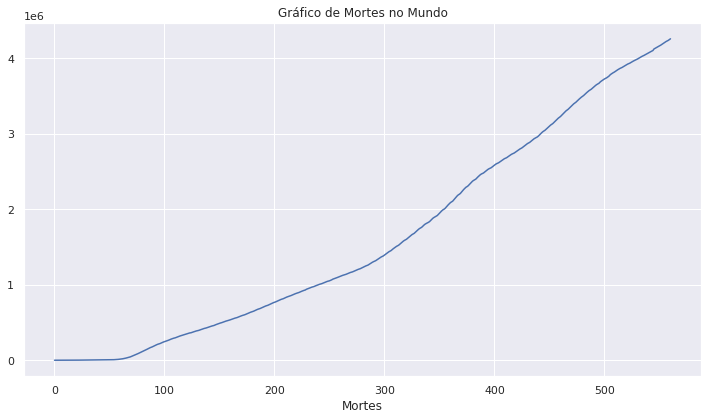

In [128]:
sns.set()
fig, ax = plt.subplots(figsize = (10,6))
ax = df.loc[df.location == "World", 'total_deaths'].reset_index(drop=True).plot()

ax.set_title('Gráfico de Mortes no Mundo')
ax.set_xlabel('Mortes')

plt.tight_layout()

**Gráfico de Dispersão PIB em relação a quantidade de Mortos**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


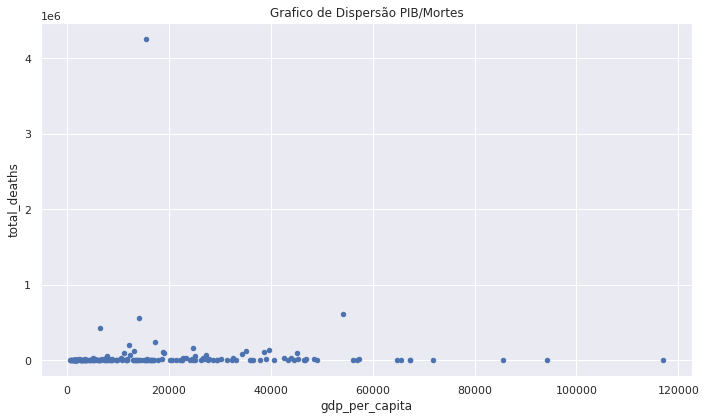

In [129]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))

df.loc[df.date == '2021-08-04'].plot.scatter(x='gdp_per_capita', y='total_deaths', ax=ax)
ax.set_title('Grafico de Dispersão PIB/Mortes')

plt.tight_layout()

**Quantidade de Casos/Morte no Brasil**

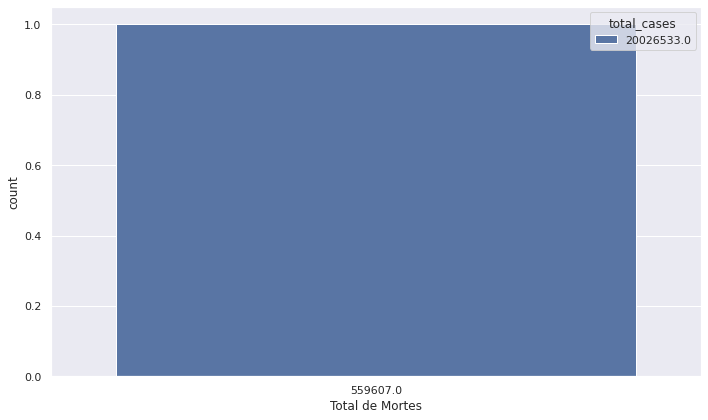

In [130]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(x = 'total_deaths' , hue = 'total_cases', data=df.loc[(df.date == '2021-08-04') & (df.location == 'Brazil')])

ax.set_xlabel('Total de Mortes')

plt.tight_layout()

Observamos acima que até a data de 04/08/2021, infelizmente atingimos 20 milhões de casos no Brasil e destes 559 mil mortes.

##Ánalise Exploratória no Brasil

In [131]:
df.loc[(df.date == '2021-08-04') & (df.location == 'Brazil')]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
14140,BRA,South America,Brazil,2021-08-04,20026533.0,40716.0,32778.143,559607.0,1175.0,918.286,94216.168,191.551,154.207,2632.709,5.528,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147214665.0,107980946.0,43375897.0,1656401.0,1333416.0,69.26,50.8,20.41,6273.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


**Algumas informações importante sobre o Covid-19 no Brasil:**

**Data 04/08/2021**

* Total de Casos: 20.026.533
* Novos Casos: 40.716
* Total de Mortos: 559.607
* Novas Mortes: 1.175
* Total de Vacinados - 147.214.665
* Total de pessoas com 1º Dose + 2º Dose ou Dose Única: 43.375.897
* Novos Vacinados: 1.656.401

In [132]:
#Criando um novo DataFrame setando o Brasil e o periodo de data
df_brasil_data = df.loc[(df.location == 'Brazil') & ((df.date >= '2021-01-01') & (df.date <= '2021-07-31'))].copy()

In [133]:
#Transformando a coluna date em index
df_brasil_data.set_index('date', inplace=True)

**Novos Casos no Brasil de Janeiro a Julho/2021**

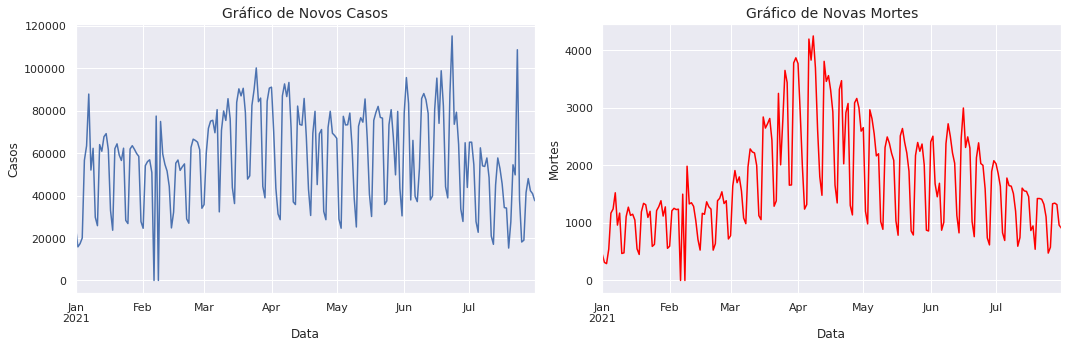

In [134]:
sns.set()
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

df_brasil_data['new_cases'].plot(kind='line',ax = ax[0])
ax[0].set_title('Gráfico de Novos Casos', size=14)
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Casos')

df_brasil_data['new_deaths'].plot(kind='line',ax = ax[1], color='red')
ax[1].set_title('Gráfico de Novas Mortes', size=14)
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Mortes')

plt.tight_layout()


In [135]:
df_brasil_data['new_cases'].sort_values(ascending=False)

date
2021-06-23    115228.0
2021-07-23    108732.0
2021-03-25    100158.0
2021-06-18     98832.0
2021-06-02     95601.0
                ...   
2021-07-12     17031.0
2021-01-02     15827.0
2021-07-19     15271.0
2021-02-06         0.0
2021-02-08         0.0
Name: new_cases, Length: 212, dtype: float64

In [136]:
df_brasil_data['new_deaths'].sort_values(ascending=False)

date
2021-04-08    4249.0
2021-04-06    4195.0
2021-03-31    3869.0
2021-04-07    3829.0
2021-04-13    3808.0
               ...  
2021-01-18     452.0
2021-01-02     314.0
2021-01-03     293.0
2021-02-06       0.0
2021-02-08       0.0
Name: new_deaths, Length: 212, dtype: float64

<p align="justify">Podemos observar acima que entre junho e julho foi o maior pico de novos casos no país em 2021, onde em 23 de junho tivemos 115.228 novos casos e em 06/02 não tivemos nenhum novo caso no país. Quantos as Mortes em Abril foi o pico de novas mortes no Brasil. Lembrando que de acordo com dados oficiais as primeiras vacinas aplicadas no Brasil foi no inicio da segunda semana de Janeiro/2021.</p>

**Gráfico de Mortes no Brasil de Janeiro a Julho/2021**

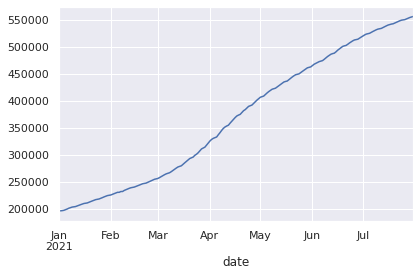

In [137]:
fig, ax = plt.subplots()
df_brasil_data['total_deaths'].plot(kind='line', ax=ax)

plt.tight_layout()

**Quantidade de Pessoas que falta se vacinar com ao menos uma Dose**

In [154]:
df_vacinados = df_brasil_data.loc['2021-07-31']['population'] - df.loc[(df.location == 'Brazil') & (df.date == '2021-08-04'), 'total_vaccinations']
vacinados = float(df_vacinados.to_string(index=False))
print('Pessoas a serem vacinadas com ao menos uma Dose: {:.2f}'.format(vacinados))

Pessoas a serem vacinadas com ao menos uma Dose: 65344744.00


#Conclusão

Através desses dados foi possivel tirar vários insights sobre a pandemia no Brasil e no Mundo, saúde é um setor que praticamente trabalhei por 4 anos e estive a frente da COVID-19, infelizmente é uma área complexa de se trabalhar, e em momentos como esse que fizemos parte da estátistica é pior ainda. Podemos tirar diversas conclusões sobre este trabalho e muito pode ser feito ainda, como quantidade de testes realizados, comparação entre casos X vacinação, mortes X vacinação, entre muito outros. Espero que tenham gostado, acompanhem meu [GIT](https://github.com/hlsvalle/data-science).  